# Case Study (Summer Olympics)

## Grouping and aggregating

**The Olympic medal data** for the following exercises comes from [The Guardian](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data). It comprises records of all events held at the Olympic games between 1896 and 2012.

Suppose you have loaded the data into a DataFrame `medals`. You now want to find the total number of medals awarded to the USA per edition. To do this, filter the `'USA'` rows and use the `.groupby()` function to put the `'Edition'` column on the index:

In [1]:
import pandas as pd

In [2]:
medals = pd.read_csv('data/olympics.csv')
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [3]:
USA_edition_grouped = medals.loc[medals.NOC == 'USA'].groupby('Edition')

Given the goal of finding the total number of USA medals awarded per edition, what column should you select and which aggregation method should you use?

answer: `USA_edition_grouped['Medal'].count()`

In [4]:
USA_edition_grouped['Medal'].count()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
1920    193
1924    198
1928     84
1932    181
1936     92
1948    148
1952    130
1956    118
1960    112
1964    150
1968    149
1972    155
1976    155
1984    333
1988    193
1992    224
1996    260
2000    248
2004    264
2008    315
Name: Medal, dtype: int64

## Using .value_counts() for ranking

For this exercise, you will use the pandas Series method `.value_counts()` to determine the top 15 countries ranked by total number of medals.

Notice that `.value_counts()` sorts by values by default. The result is returned as a Series of counts indexed by unique entries from the original Series with values (counts) ranked in descending order.

In [5]:
# Select the 'NOC' column of medals: country_names
# Extract the 'NOC' column from the DataFrame medals and 
#  assign the result to country_names. Notice that this Series 
#  has repeated entries for every medal (of any type) 
#  a country has won in any Edition of the Olympics.
country_names = medals['NOC']

In [6]:
# Count the number of medals won by each country: medal_counts
# Create a Series medal_counts by applying .value_counts() 
#  to the Series country_names.
medal_counts = country_names.value_counts()

In [7]:
# Print top 15 countries ranked by medals
medal_counts.head(15)

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64

## Using .pivot_table() to count medals by type

Rather than ranking countries by total medals won and showing that list, you may want to see a bit more detail. You can use a pivot table to compute how many separate bronze, silver and gold medals each country won. That pivot table can then be used to repeat the previous computation to rank by total medals won.

In this exercise, you will use `.pivot_table()` first to aggregate the total medals by type. Then, you can use `.sum()` along the columns of the pivot table to produce a new column. When the modified pivot table is sorted by the total medals column, you can display the results from the last exercise with a bit more detail.

In [8]:
# Construct the pivot table: counted
# Construct a pivot table counted from the DataFrame medals, 
#  aggregating by 'count'. Use 'NOC' as the index, 'Athlete' 
#  for the values, and 'Medal' for the columns.
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')

In [9]:
# Create the new column: counted['totals']
# Modify the DataFrame counted by adding a column counted['totals']. 
#  The new column 'totals' should contain the result of taking 
#  the sum along the columns (i.e., use .sum(axis='columns')).
counted['totals'] = counted.sum(axis='columns')

In [10]:
# Sort counted by the 'totals' column
# Overwrite the DataFrame counted by sorting it with 
#  the .sort_values() method. Specify the keyword argument ascending=False.
counted = counted.sort_values('totals', ascending=False)

In [11]:
# Print the top 15 rows of counted
counted.head(15)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


## Applying .drop_duplicates()

What could be the difference between the `'Event_gender'` and `'Gender'` columns? You should be able to evaluate your guess by looking at the unique values of the pairs `(Event_gender, Gender)` in the data. In particular, you should not see something like `(Event_gender='M', Gender='Women')`. However, you will see that, strangely enough, there is an observation with `(Event_gender='W', Gender='Men')`.

The duplicates can be dropped using the `.drop_duplicates()` method, leaving behind the unique observations.

In [12]:
# Select columns: ev_gen
# Select the columns 'Event_gender' and 'Gender'.
ev_gen = medals[['Event_gender', 'Gender']]

In [13]:
# Drop duplicate pairs: ev_gen_uniques
# Create a dataframe ev_gen_uniques containing 
#  the unique pairs contained in ev_gen.
ev_gen_uniques = ev_gen.drop_duplicates()

In [14]:
# Print ev_gen_uniques
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


## Finding possible errors with .groupby()

You will now use `.groupby()` to continue your exploration. Your job is to group by `'Event_gender'` and `'Gender'` and count the rows.

You will see that there is only one suspicious row: This is likely a data error.

In [15]:
# Group medals by the two columns: medals_by_gender
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])

In [16]:
# Create a DataFrame with a group count: medal_count_by_gender
medal_count_by_gender = medals_by_gender.count()

In [17]:
# Print medal_count_by_gender
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

## Locating suspicious data

You will now inspect the suspect record by locating the offending row.

You will see that, according to the data, Joyce Chepchumba was a man that won a medal in a women's event. That is a data error as you can confirm with a web search.

In [18]:
# Create the Boolean Series: sus
# Create a Boolean Series with a condition that captures 
#  the only row that has medals.Event_gender == 'W' 
#  and medals.Gender == 'Men'. Be sure to use the & operator.
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')

In [19]:
# Create a DataFrame with the suspicious row: suspect
suspect = medals[sus]
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


## Using .nunique() to rank by distinct sports

You may want to know which countries won medals in the most distinct sports. The `.nunique()` method is the principal aggregation here. Given a categorical Series `S`, `S.nunique()` returns the number of distinct categories.

In [20]:
# Group medals by 'NOC': country_grouped
country_grouped = medals.groupby('NOC')

In [21]:
# Compute the number of distinct sports in which each country won medals: Nsports
Nsports = country_grouped['Sport'].nunique()

In [22]:
# Sort the values of Nsports in descending order
Nsports = Nsports.sort_values(ascending=False)
Nsports.head(15)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64

## Counting USA vs. USSR Cold War Olympic Sports

The Olympic competitions between 1952 and 1988 took place during the height of the Cold War between the United States of America (USA) & the Union of Soviet Socialist Republics (USSR). Your goal in this exercise is to aggregate the number of distinct sports in which the USA and the USSR won medals during the Cold War years.

The construction is mostly the same as in the preceding exercise. There is an additional filtering stage beforehand in which you reduce the original DataFrame medals by extracting data from the Cold War period that applies only to the US or to the USSR. The relevant country codes in the DataFrame, which has been pre-loaded as medals, are `'USA'` & `'URS'`.

In [23]:
# Extract all rows for which the 'Edition' is between 1952 & 1988: during_cold_war
# Using medals, create a Boolean Series called during_cold_war 
#  that is True when 'Edition' is >= 1952 and <= 1988.
during_cold_war = (medals['Edition'] >= 1952) & (medals['Edition'] <= 1988)

In [24]:
# Extract rows for which 'NOC' is either 'USA' or 'URS': is_usa_urs
# Using medals, create a Boolean Series called is_usa_urs that is True 
#  when 'NOC' is either 'USA' or 'URS'.
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

In [25]:
# Use during_cold_war and is_usa_urs to create the DataFrame: cold_war_medals
# Filter the medals DataFrame using during_cold_war and is_usa_urs 
#  to create a new DataFrame called cold_war_medals.
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

In [26]:
# Group cold_war_medals by 'NOC'
country_grouped = cold_war_medals.groupby('NOC')

In [27]:
# Create Nsports
# Create a Series Nsports from country_grouped 
#  using indexing & chained methods:
#  - Extract the column 'Sport'.
#  - Use .nunique() to get the number of unique elements in each group;
#  - Apply .sort_values(ascending=False) to rearrange the Series.
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)
Nsports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

## Counting USA vs. USSR Cold War Olympic Medals

For this exercise, you want to see which country, the USA or the USSR, won the most medals consistently over the Cold War period.

There are several steps involved in carrying out this computation.

- You'll need a pivot table with years ('Edition') on the index and countries ('NOC') on the columns. The entries will be the total number of medals each country won that year. If the country won no medals in a given edition, expect a NaN in that entry of the pivot table.
- You'll need to slice the Cold War period and subset the 'USA' and 'URS' columns.
- You'll need to make a Series from this slice of the pivot table that tells which country won the most medals in that edition using `.idxmax(axis='columns')`. If `.max()` returns the maximum value of Series or 1D array, `.idxmax()` returns the index of the maximizing element. The argument `axis=columns` or `axis=1` is required because, by default, this aggregation would be done along columns for a DataFrame.
- The final Series contains either 'USA' or 'URS' according to which country won the most medals in each Olympic edition. You can use `.value_counts()` to count the number of occurrences of each.

In [28]:
# Create the pivot table: medals_won_by_country
# Construct medals_won_by_country using medals.pivot_table().
#  - The index should be the years ('Edition') 
#    & the columns should be country ('NOC')
#  - The values should be 'Athlete' (which captures every medal 
#    regardless of kind) & the aggregation method should be 'count' 
#    (which captures the total number of medals won).
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')

In [29]:
# Slice medals_won_by_country: cold_war_usa_urs_medals
# Create cold_war_usa_urs_medals by slicing the pivot table 
#  medals_won_by_country. Your slice should contain the editions 
#  from years 1952:1988 and only the columns 'USA' & 'URS' 
#  from the pivot table.
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

In [31]:
# Create most_medals 
# Create the Series most_medals by applying the .idxmax() method 
#  to cold_war_usa_urs_medals. Be sure to use axis='columns'.
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')

In [32]:
# Print most_medals.value_counts()
# Print the result of applying .value_counts() to most_medals. 
#  The result reported gives the number of times each of the USA 
#  or the USSR won more Olympic medals in total than the other 
#  between 1952 and 1988.
most_medals.value_counts()

URS    8
USA    2
dtype: int64

## Visualizing USA Medal Counts by Edition: Line Plot

Your job in this exercise is to visualize the medal counts by 'Edition' for the USA.

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

In [35]:
# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

In [36]:
# Reshape usa_medals_by_year by unstacking
# Use .unstack() with level='Medal' to reshape 
#  the DataFrame usa_medals_by_year.
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

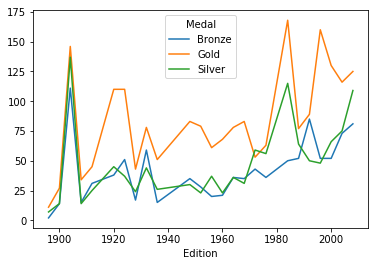

In [37]:
# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot()
plt.show();

## Visualizing USA Medal Counts by Edition: Area Plot

As in the previous exercise, your job in this exercise is to visualize the medal counts by 'Edition' for the USA. This time, you will use an area plot to see the breakdown better. The `usa` DataFrame has been created and all reshaping from the previous exercise has been done. You need to write the plotting command.

In [38]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

In [39]:
# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

In [40]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

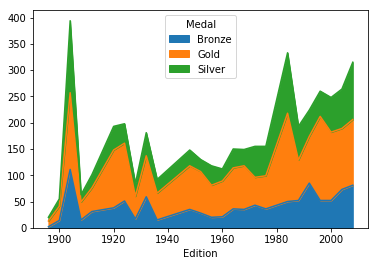

In [41]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show();

## Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

You may have noticed that the medals are ordered according to a lexicographic (dictionary) ordering: Bronze < Gold < Silver. However, you would prefer an ordering consistent with the Olympic rules: Bronze < Silver < Gold.

You can achieve this using **Categorical types**. In this final exercise, after redefining the 'Medal' column of the DataFrame medals, you will repeat the area plot from the previous exercise to see the new ordering.

In [42]:
# Redefine 'Medal' as an ordered categorical
# Redefine the 'Medal' column of the DataFrame medals as 
#  an ordered categorical. To do this, use pd.Categorical() 
#  with three keyword arguments:
#  - values = medals.Medal.
#  - categories=['Bronze', 'Silver', 'Gold'].
#  - ordered=True.
#  - After this, you can verify that the type has changed using medals.info().

medals.Medal = pd.Categorical(values=medals.Medal,categories=['Bronze','Silver','Gold'],ordered=True)

In [43]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

In [44]:
# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

In [45]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

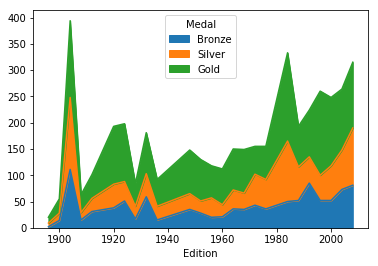

In [46]:
# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show();